# Introdução a algorítimos não supervisionados

## Importar dados

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
CSV_URL = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'

In [6]:
df_movies = pd.read_csv(CSV_URL)
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
genres_dummies = df_movies['genres'].str.get_dummies()
genres = pd.concat([
    df_movies,
    df_movies['genres'].str.get_dummies()
], axis=1)
genres.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Escalar dados

In [11]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
genres_scaled = scaler.fit_transform(genres_dummies)
genres_scaled

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

## Modeling

In [15]:
from sklearn.cluster import KMeans

In [21]:
model_kmeans = KMeans(n_clusters=3)
model_kmeans.fit(genres_scaled)
print('Groups: ', np.unique(model_kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Groups:  [0 1 2]


In [22]:
print(genres_dummies.columns)
print(model_kmeans.cluster_centers_)

Index(['movieId', 'title', 'genres', '(no genres listed)', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')
[[-0.05917995  0.12521866  1.10933211  1.94480583  2.12120532  0.16103537
  -0.3218147  -0.19989888 -0.59904787  1.2001225  -0.09492563 -0.27631651
   0.2981668   0.31347518 -0.14130534 -0.27238059  0.14223653 -0.47049038
  -0.17378941 -0.08985123]
 [ 0.0389363  -0.38950527 -0.253211   -0.25236189 -0.26910065  0.2445899
  -0.19021433  0.13899542  0.14395404 -0.16367531 -0.07683596 -0.14547767
  -0.10953487  0.02669684 -0.18488793  0.20983585 -0.22863291 -0.47061762
   0.01805515  0.04231212]
 [-0.05917995  0.77647728  0.09857422 -0.23337565 -0.26758729 -0.58229664
   0.53052563 -0.21575165 -0.06853719 -0.12716638  0.20044449  0.41768075
   0.11444759 -0.18048573  0.44789997 -0.33732

In [24]:
clusters_xyz = pd.DataFrame(
    model_kmeans.cluster_centers_,
    columns=genres_dummies.columns
)
clusters_xyz

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.125219,1.109332,1.944806,2.121205,0.161035,-0.321815,-0.199899,-0.599048,1.200123,-0.094926,-0.276317,0.298167,0.313475,-0.141305,-0.272381,0.142237,-0.470490,-0.173789,-0.089851
1,0.038936,-0.389505,-0.253211,-0.252362,-0.269101,0.244590,-0.190214,0.138995,0.143954,-0.163675,-0.076836,-0.145478,-0.109535,0.026697,-0.184888,0.209836,-0.228633,-0.470618,0.018055,0.042312
2,-0.059180,0.776477,0.098574,-0.233376,-0.267587,-0.582297,0.530526,-0.215752,-0.068537,-0.127166,0.200444,0.417681,0.114448,-0.180486,0.447900,-0.337329,0.428617,1.183882,0.030389,-0.054218


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
       <Axes: title={'center': '2'}>], dtype=object)

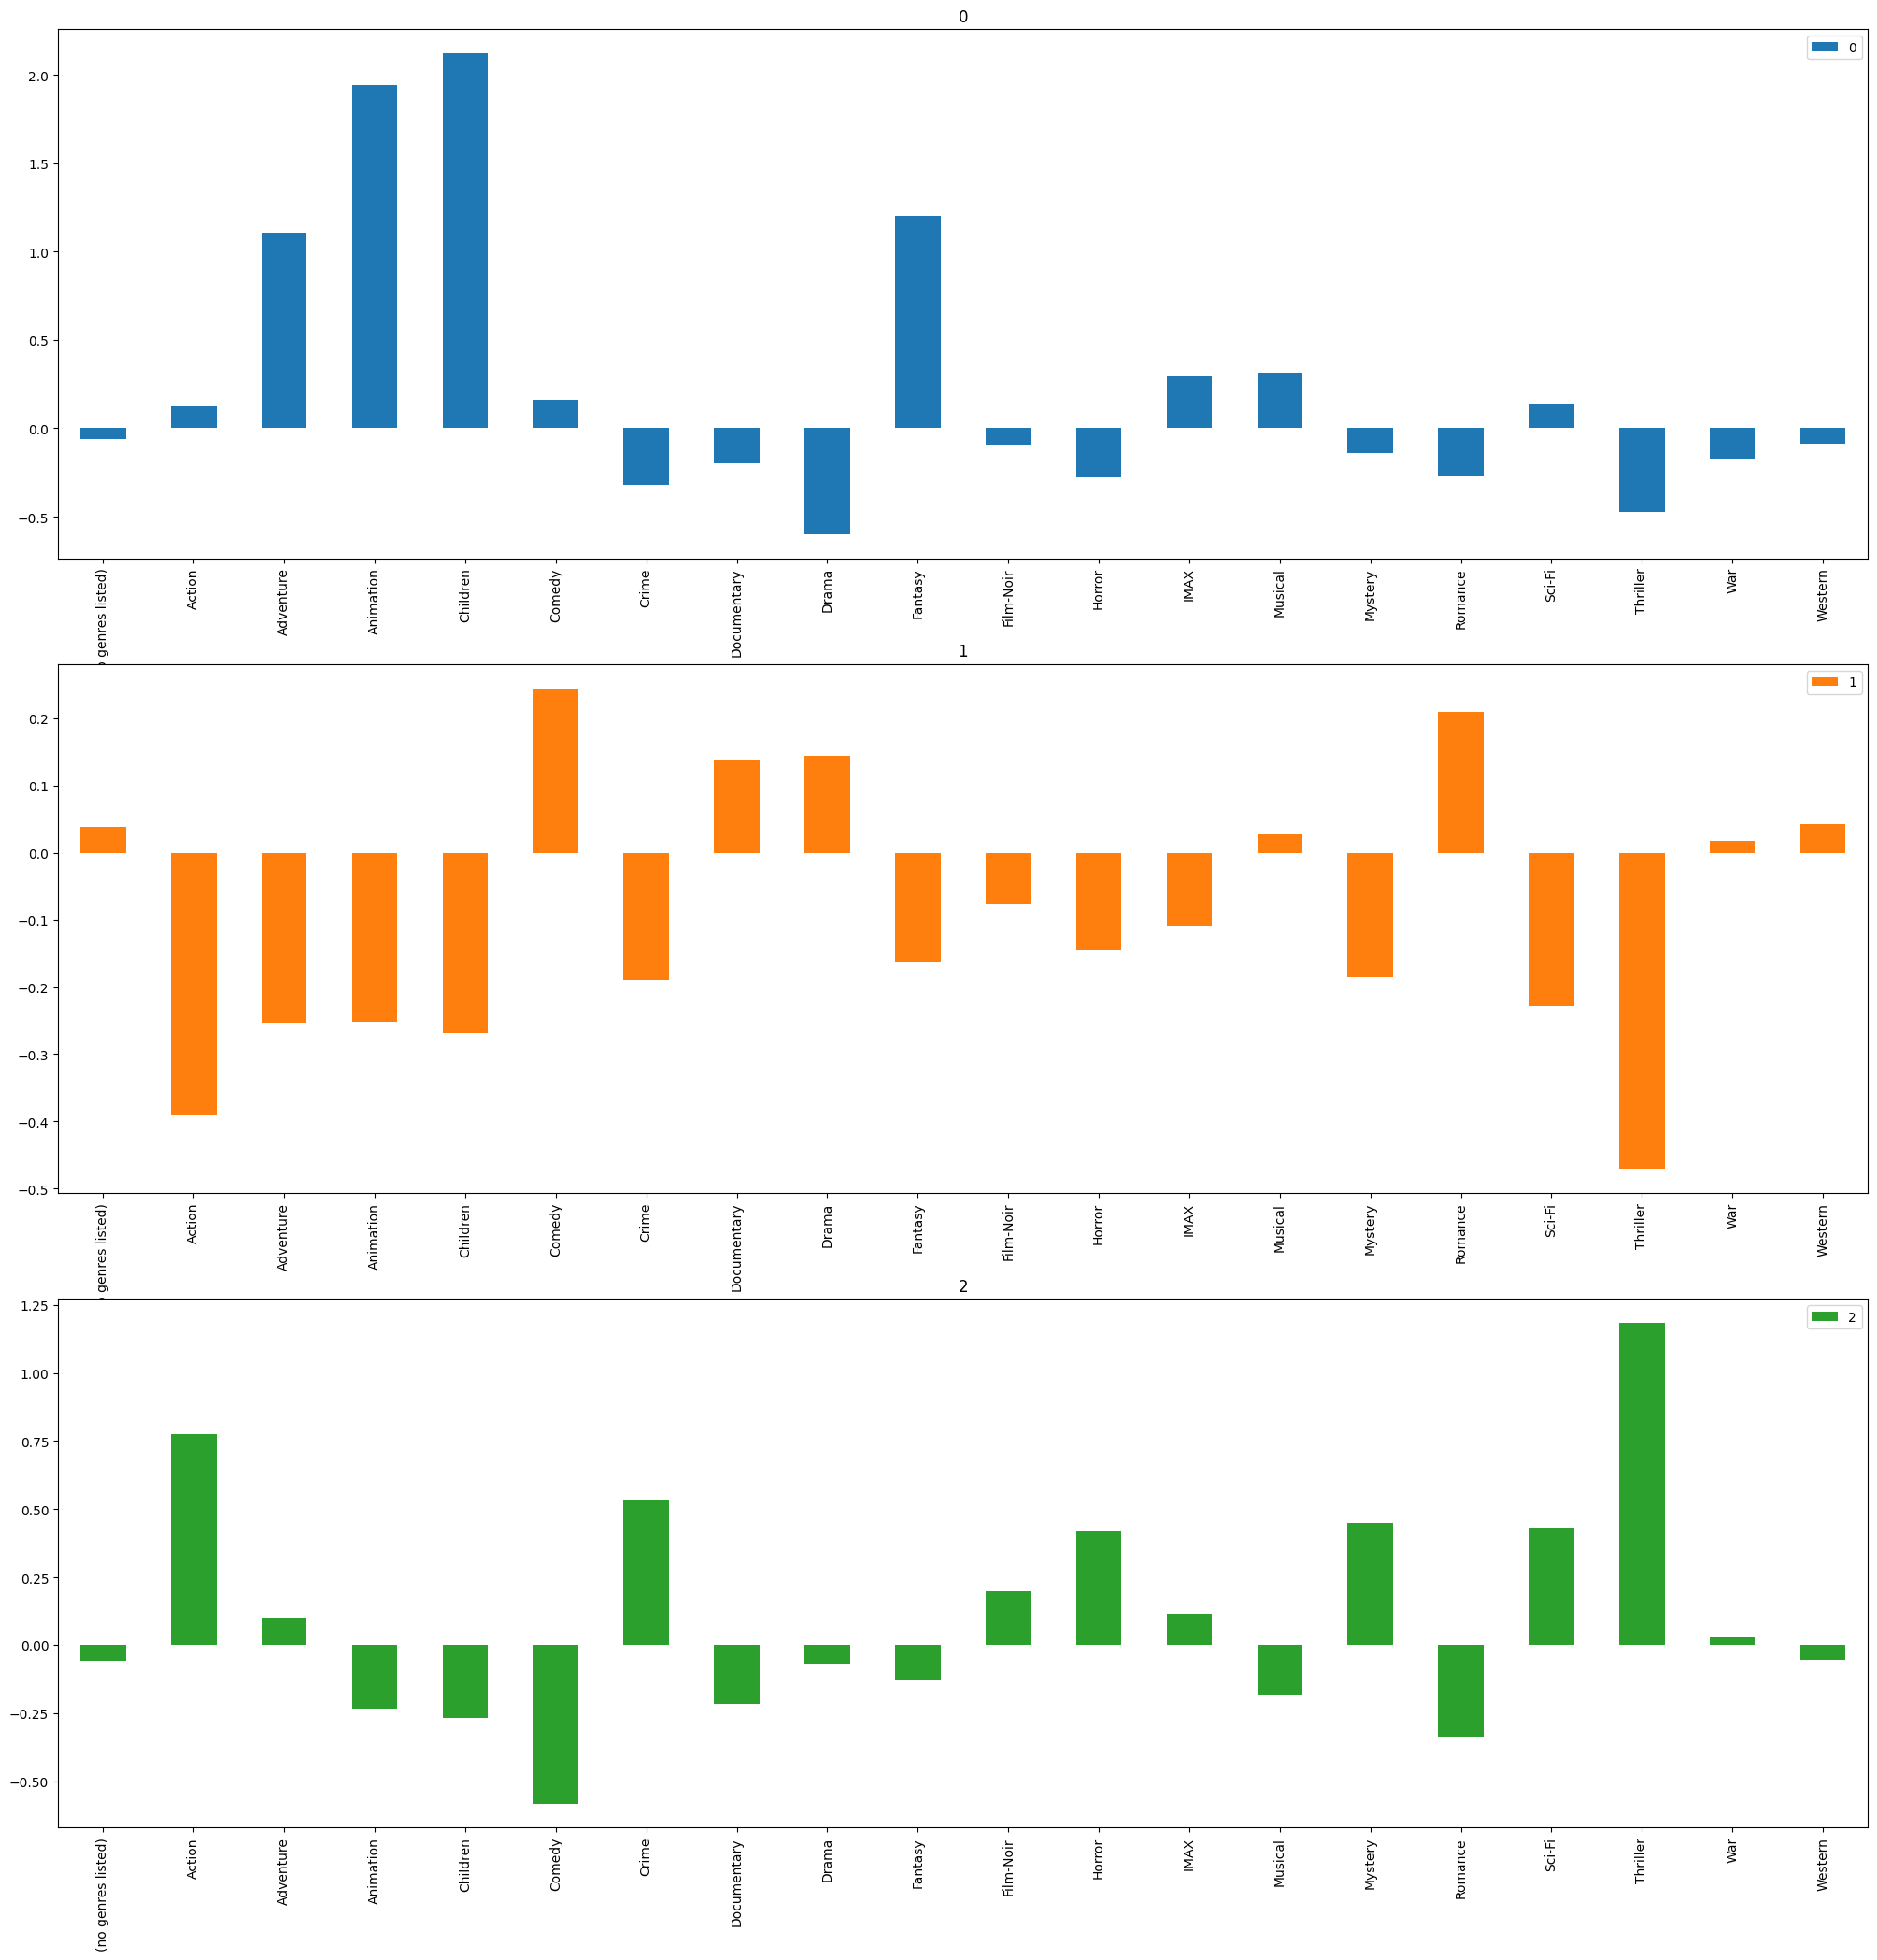

In [25]:
clusters_xyz.transpose().plot.bar(subplots=True,
                                  figsize=(25, 25),
                                  sharex=False)

## Redimensionamento de dados

In [26]:
from sklearn.manifold import TSNE

In [31]:
tsne = TSNE(random_state=0)
view = tsne.fit_transform(genres_scaled)
view

array([[108.33813  ,  21.358685 ],
       [ 86.78447  ,  -2.4059873],
       [ 25.27029  , -14.965978 ],
       ...,
       [-92.85537  , -26.874924 ],
       [ 74.4073   ,  27.117836 ],
       [ 52.67159  , -85.05768  ]], dtype=float32)

<Axes: >

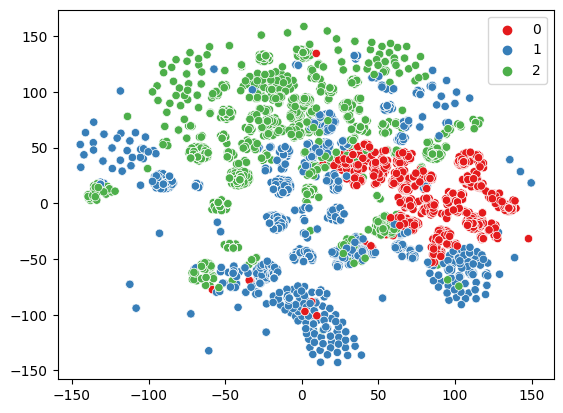

In [32]:
sns.scatterplot(x=view[:, 0],
            y=view[:, 1],
            hue=model_kmeans.labels_,
            palette=sns.color_palette('Set1', 3))

In [33]:
model_kmeans = KMeans(n_clusters=20)
model_kmeans.fit(genres_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=20)

In [36]:
clusters_xyz = pd.DataFrame(model_kmeans.cluster_centers_,
                            columns=genres_dummies.columns)
clusters_xyz

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,-0.456038,-0.357392,-0.238898,-0.260936,-0.599974,-0.338134,4.597924,-0.808616,-0.277127,-0.094926,-0.318096,-0.128397,-0.188419,-0.229602,-0.429675,-0.334435,-0.479140,-0.078470,-0.132065
1,-0.059180,-0.402082,-0.259783,-0.254960,-0.270451,0.488031,-0.374632,-0.217489,0.314727,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,2.259206,-0.262488,-0.470753,-0.202020,-0.132065
2,-0.059180,2.080702,-0.143443,-0.154409,-0.270451,-0.191920,2.669289,-0.217489,-0.092436,-0.263741,-0.094926,-0.240584,-0.128397,-0.188419,-0.249986,-0.374329,-0.213032,0.850240,-0.202020,-0.132065
3,-0.059180,-0.211325,-0.327719,-0.248595,-0.260750,-0.229511,-0.337420,-0.217489,-0.688816,-0.294810,-0.094926,2.993517,-0.128397,-0.188419,-0.249986,-0.363362,0.510929,-0.491259,-0.202020,-0.132065
4,-0.059180,-0.312786,-0.295049,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.306653,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.249840,-0.491259,-0.202020,-0.132065
5,-0.059180,1.646149,1.592755,-0.069332,-0.254611,-0.505063,-0.368556,-0.217489,-0.591163,-0.154990,-0.094926,-0.307488,-0.128397,-0.188419,-0.233019,-0.350954,2.094282,0.275369,-0.202020,-0.132065
6,-0.059180,0.402104,0.034527,-0.200424,-0.259242,-0.467113,-0.297244,-0.190284,0.747226,-0.242736,-0.094926,-0.305855,-0.128397,-0.188419,-0.213968,-0.053385,-0.231129,-0.198602,4.950012,-0.132065
7,-0.059180,0.128485,0.249380,-0.183231,-0.125281,-0.303544,-0.189027,-0.188127,-0.189021,-0.159926,-0.094926,-0.192025,-0.128397,0.146687,-0.172239,-0.113141,-0.192533,-0.244737,0.112129,7.572010
8,-0.059180,-0.333405,-0.317512,-0.163864,-0.270451,-0.744895,1.444723,-0.217489,0.255531,-0.252433,10.534563,-0.257559,-0.128397,-0.188419,0.922484,-0.194188,-0.219795,0.699553,-0.202020,-0.043513
9,-0.059180,-0.440080,-0.027959,0.563605,0.721543,0.248153,-0.297570,-0.034626,-0.181104,0.265214,-0.094926,-0.260343,-0.128397,5.307322,-0.182736,0.326878,-0.260790,-0.467270,-0.169412,-0.132065


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
       <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
       <Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
       <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
       <Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
       <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>,
       <Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
       <Axes: title={'center': '14'}>, <Axes: title={'center': '15'}>,
       <Axes: title={'center': '16'}>, <Axes: title={'center': '17'}>,
       <Axes: title={'center': '18'}>, <Axes: title={'center': '19'}>],
      dtype=object)

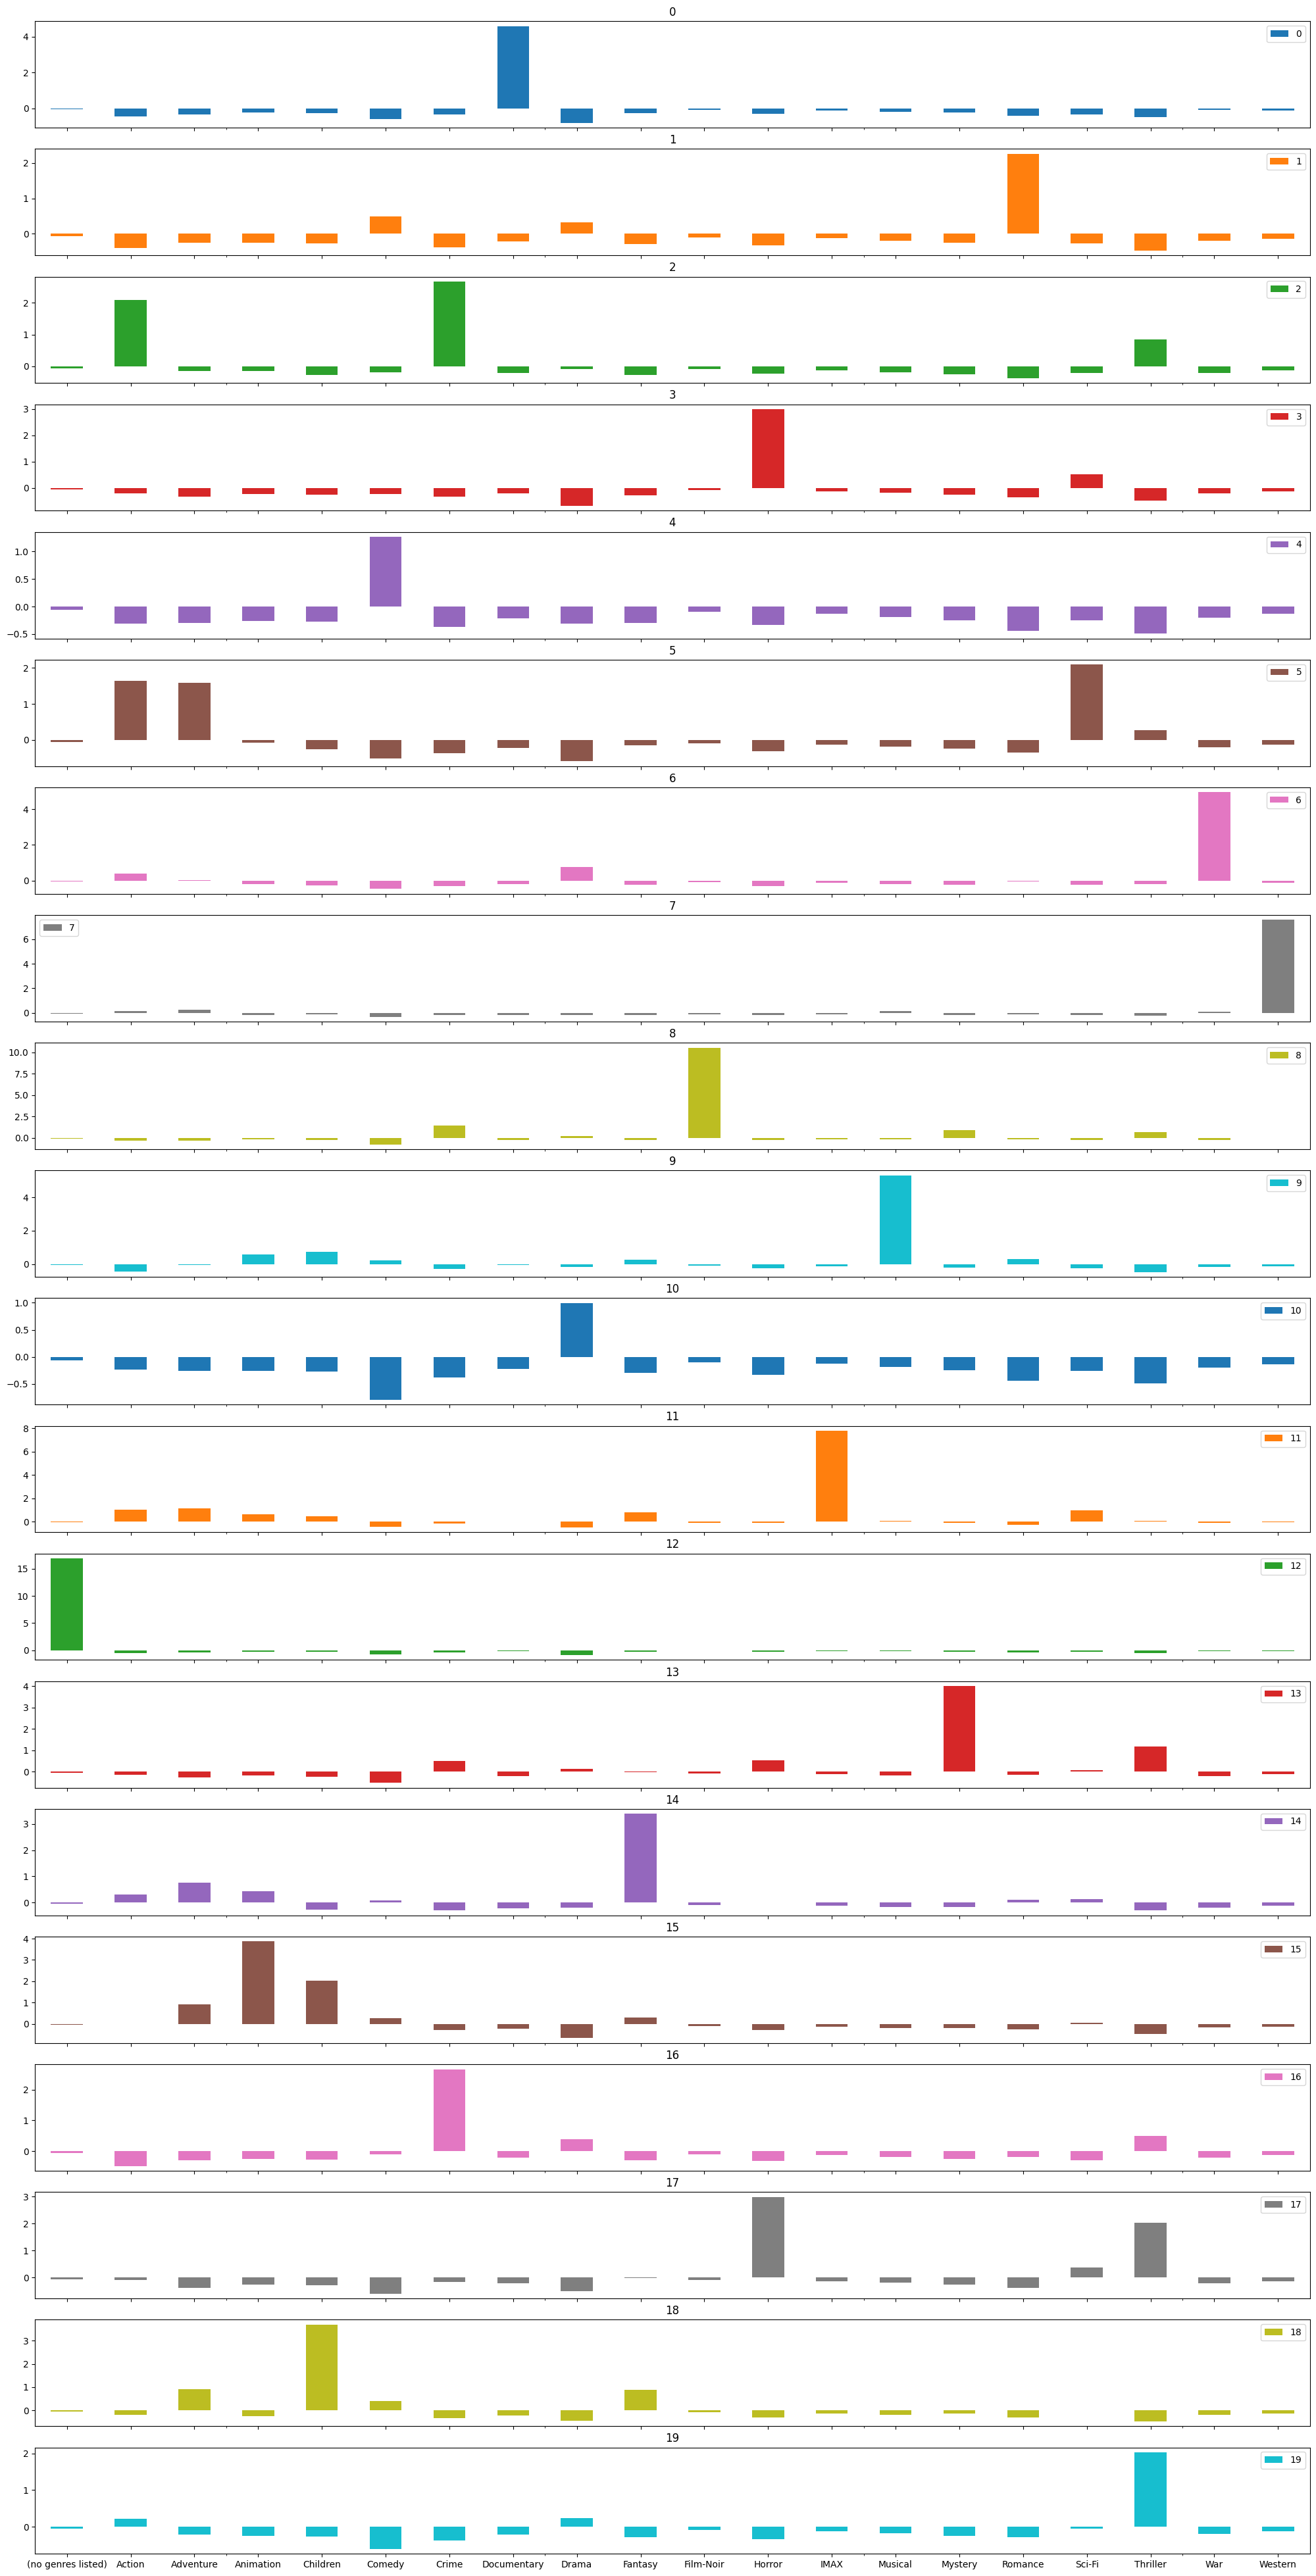

In [37]:
clusters_xyz.transpose().plot.bar(subplots=True,
                                  figsize=(25, 50),
                                  sharex=True,
                                  rot=0)

## Métrica de Inertia para KMeans

In [38]:
def calc_inertia_for_n_clusters(n_clusters, genres):
  model_kmeans = KMeans(n_clusters=n_clusters)
  model_kmeans.fit(genres)
  return [n_clusters, model_kmeans.inertia_]

In [40]:
K = 40
df_inertia = pd.DataFrame(
    [calc_inertia_for_n_clusters(k, genres_scaled) for k in range(1, K + 1)],
    columns=['Clusters', 'Inertia']
)
df_inertia

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

,Clusters,Inertia
0,1,194840.000000
1,2,179774.345397
2,3,168026.065238
3,4,156867.695943
4,5,147365.745415
5,6,136904.448334
6,7,130008.723272
7,8,118286.121049
8,9,111783.077707
9,10,102577.056120


<Figure size 5000x5000 with 0 Axes>

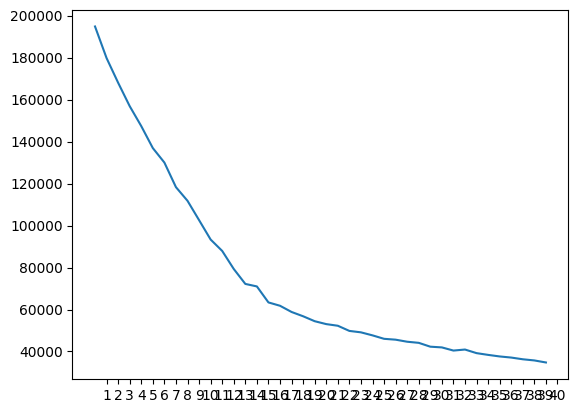

<Figure size 5000x5000 with 0 Axes>

In [44]:
df_inertia['Inertia'].plot(xticks=df_inertia['Clusters'])

## Agglomerative Clustering

In [45]:
from sklearn.cluster import AgglomerativeClustering

In [47]:
model_agg = AgglomerativeClustering(n_clusters=17)
clusters = model_agg.fit_predict(genres_scaled)
clusters

array([ 5, 14, 13, ...,  2,  5,  3])

In [48]:
tsne = TSNE()
view = tsne.fit_transform(genres_scaled)
view

array([[102.50949  ,  19.861143 ],
       [ 80.93969  ,  -2.4738855],
       [ 21.581087 , -17.509483 ],
       ...,
       [-93.18617  , -26.083393 ],
       [ 74.09347  ,  25.76531  ],
       [ 52.603996 , -84.920296 ]], dtype=float32)

<Axes: >

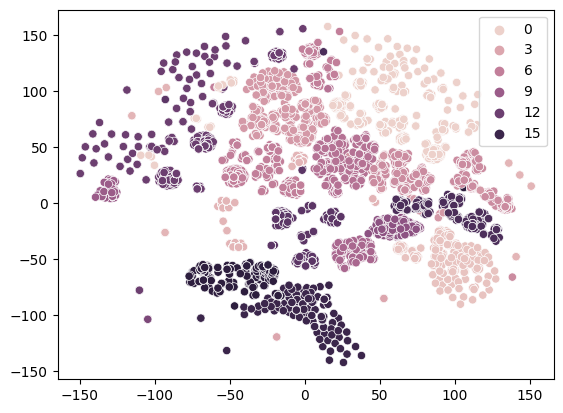

In [50]:
sns.scatterplot(x=view[:, 0],
                y=view[:, 1],
                hue=clusters)

## Hierarchy Clustering

In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [52]:
model_kmeans = KMeans(n_clusters=17)
model_kmeans.fit(genres_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=17)

In [54]:
clusters = pd.DataFrame(model_kmeans.cluster_centers_,
                        columns=genres_dummies.columns)

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
       <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
       <Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
       <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
       <Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
       <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>,
       <Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
       <Axes: title={'center': '14'}>, <Axes: title={'center': '15'}>,
       <Axes: title={'center': '16'}>], dtype=object)

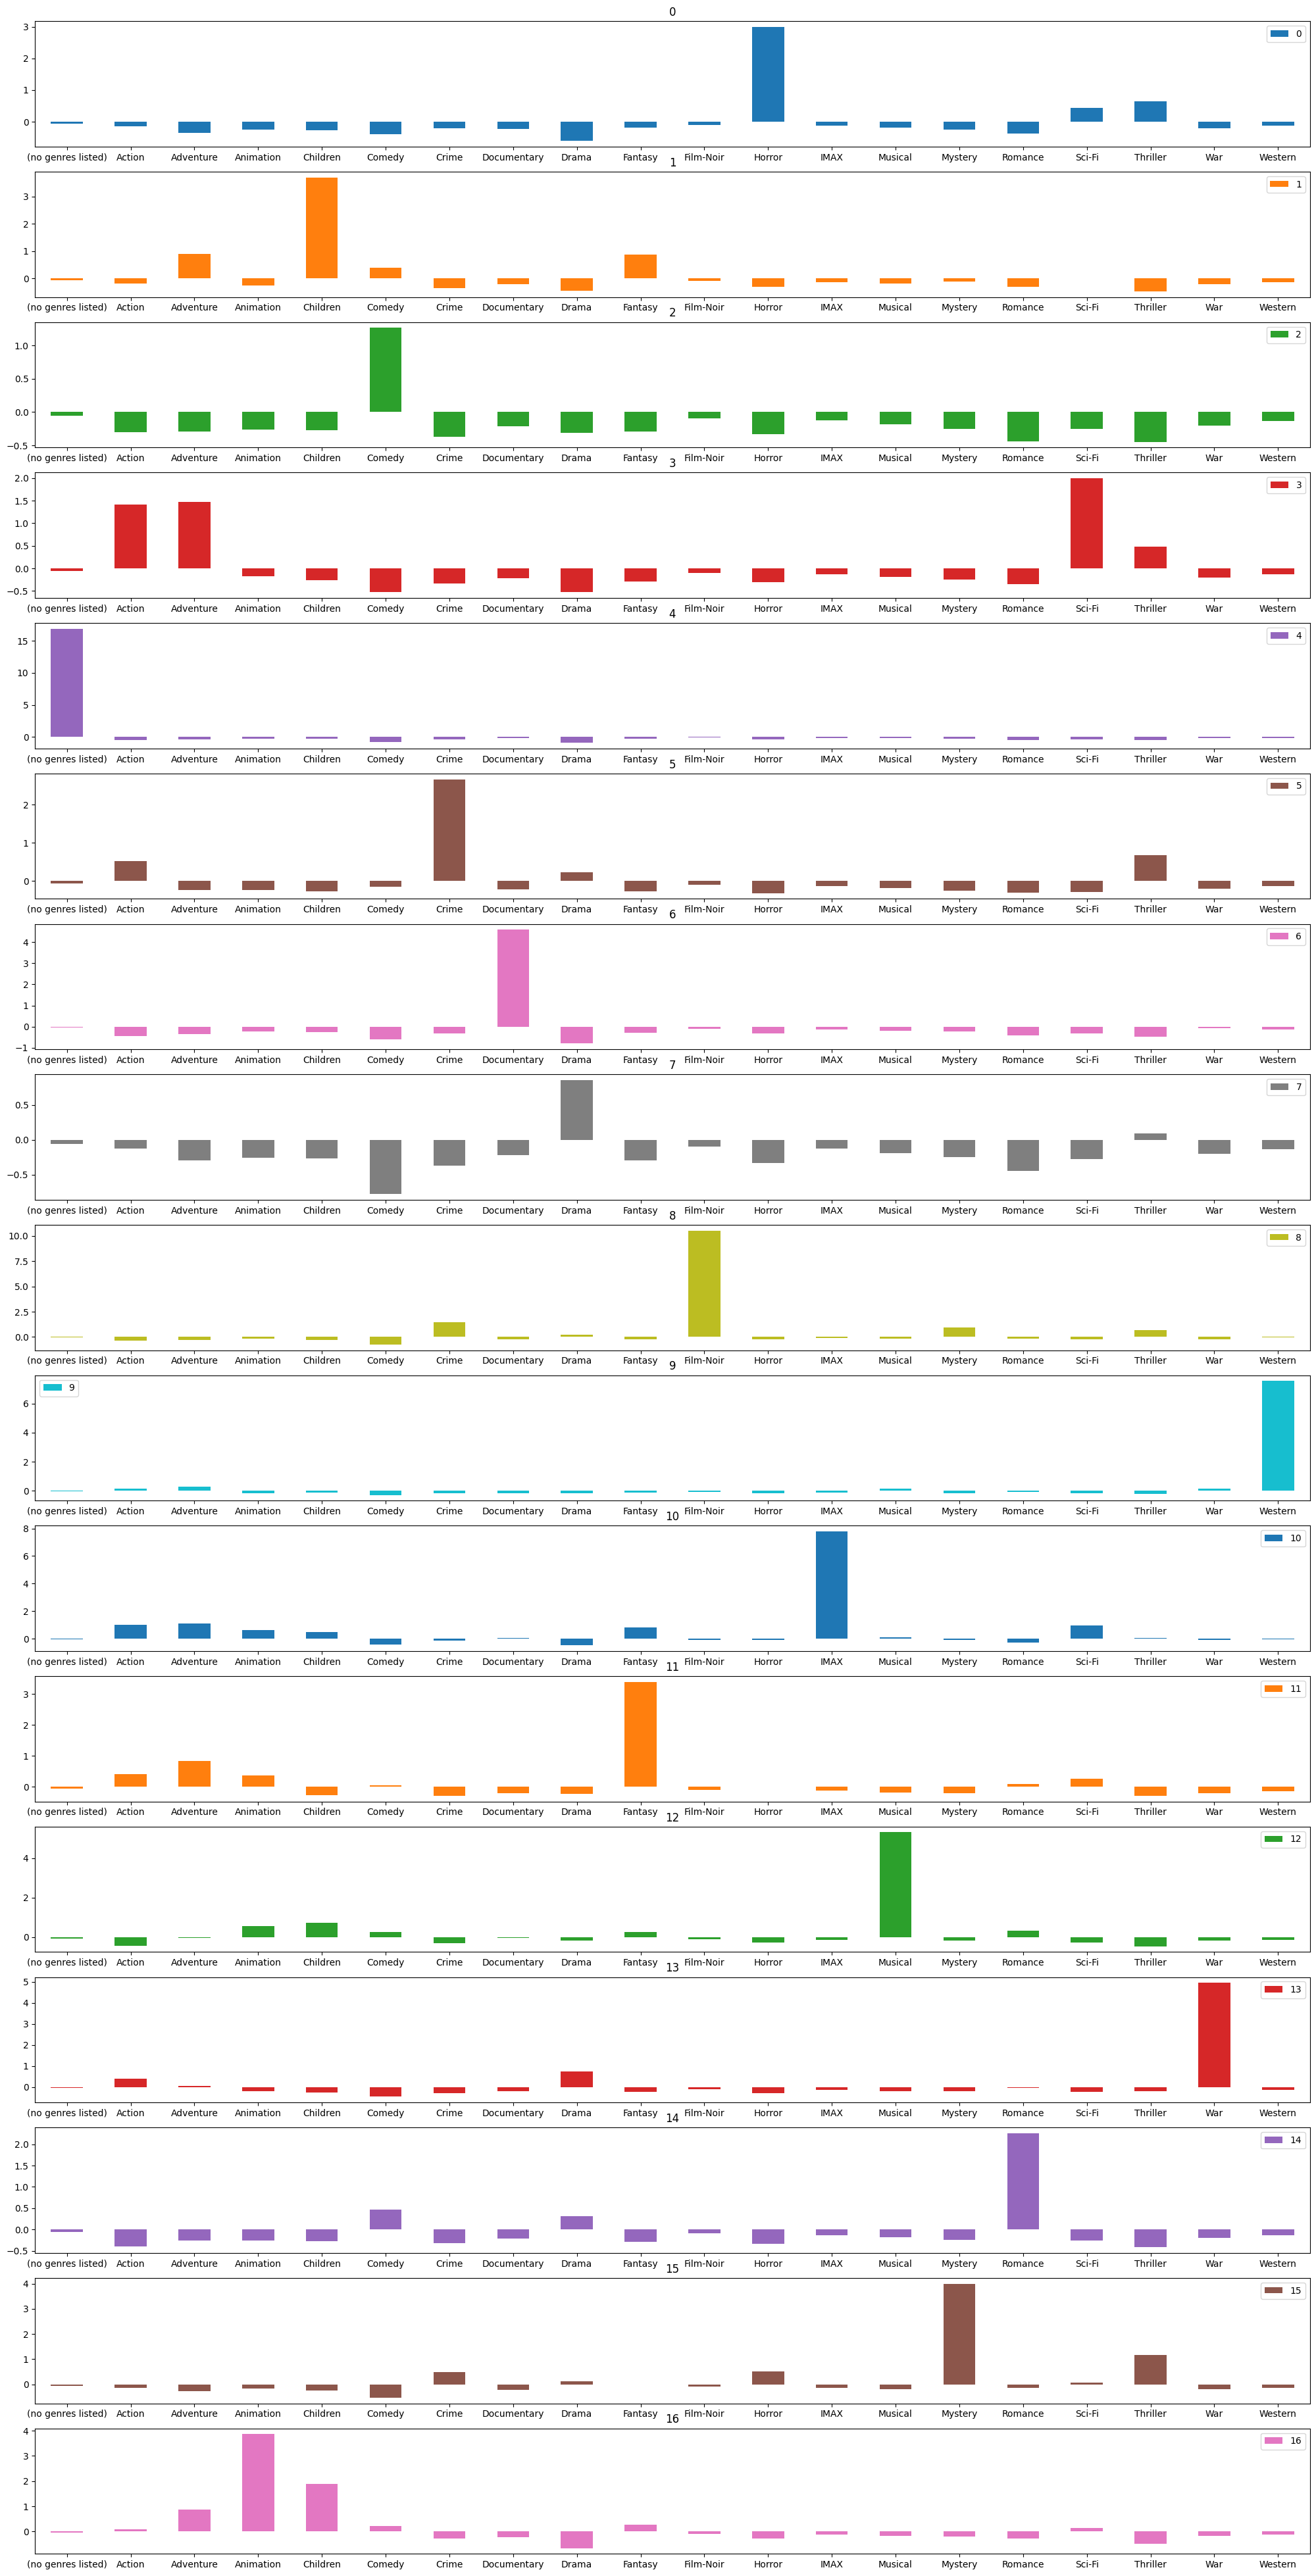

In [55]:
clusters.transpose().plot.bar(subplots=True,
                              figsize=(25, 50),
                              sharex=False,
                              rot=0)

{'icoord': [[155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [125.0, 125.0, 143.75, 143.75],
  [115.0, 115.0, 134.375, 134.375],
  [105.0, 105.0, 124.6875, 124.6875],
  [95.0, 95.0, 114.84375, 114.84375],
  [85.0, 85.0, 104.921875, 104.921875],
  [75.0, 75.0, 94.9609375, 94.9609375],
  [65.0, 65.0, 84.98046875, 84.98046875],
  [55.0, 55.0, 74.990234375, 74.990234375],
  [45.0, 45.0, 64.9951171875, 64.9951171875],
  [35.0, 35.0, 54.99755859375, 54.99755859375],
  [25.0, 25.0, 44.998779296875, 44.998779296875],
  [15.0, 15.0, 34.9993896484375, 34.9993896484375],
  [5.0, 5.0, 24.99969482421875, 24.99969482421875]],
 'dcoord': [[0.0, 2.423005347221701, 2.423005347221701, 0.0],
  [0.0, 2.8857087379941277, 2.8857087379941277, 2.423005347221701],
  [0.0, 3.288069030261993, 3.288069030261993, 2.8857087379941277],
  [0.0, 3.579596760311578, 3.579596760311578, 3.288069030261993],
  [0.0, 3.7695143752974234, 3.7695143752974234, 3.579596760311578],
  

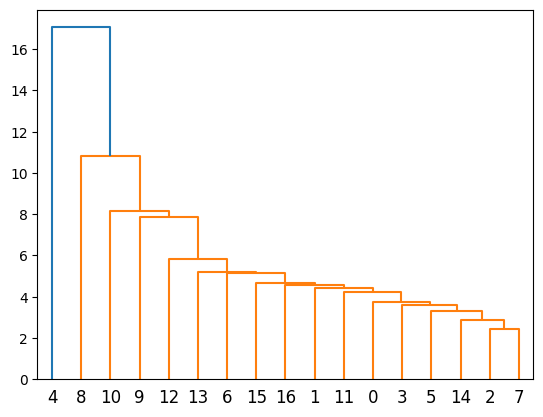

In [57]:
dendrogram(
    linkage(clusters)
)